# Linear and Polynomial Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.shape

(506, 14)

<AxesSubplot:>

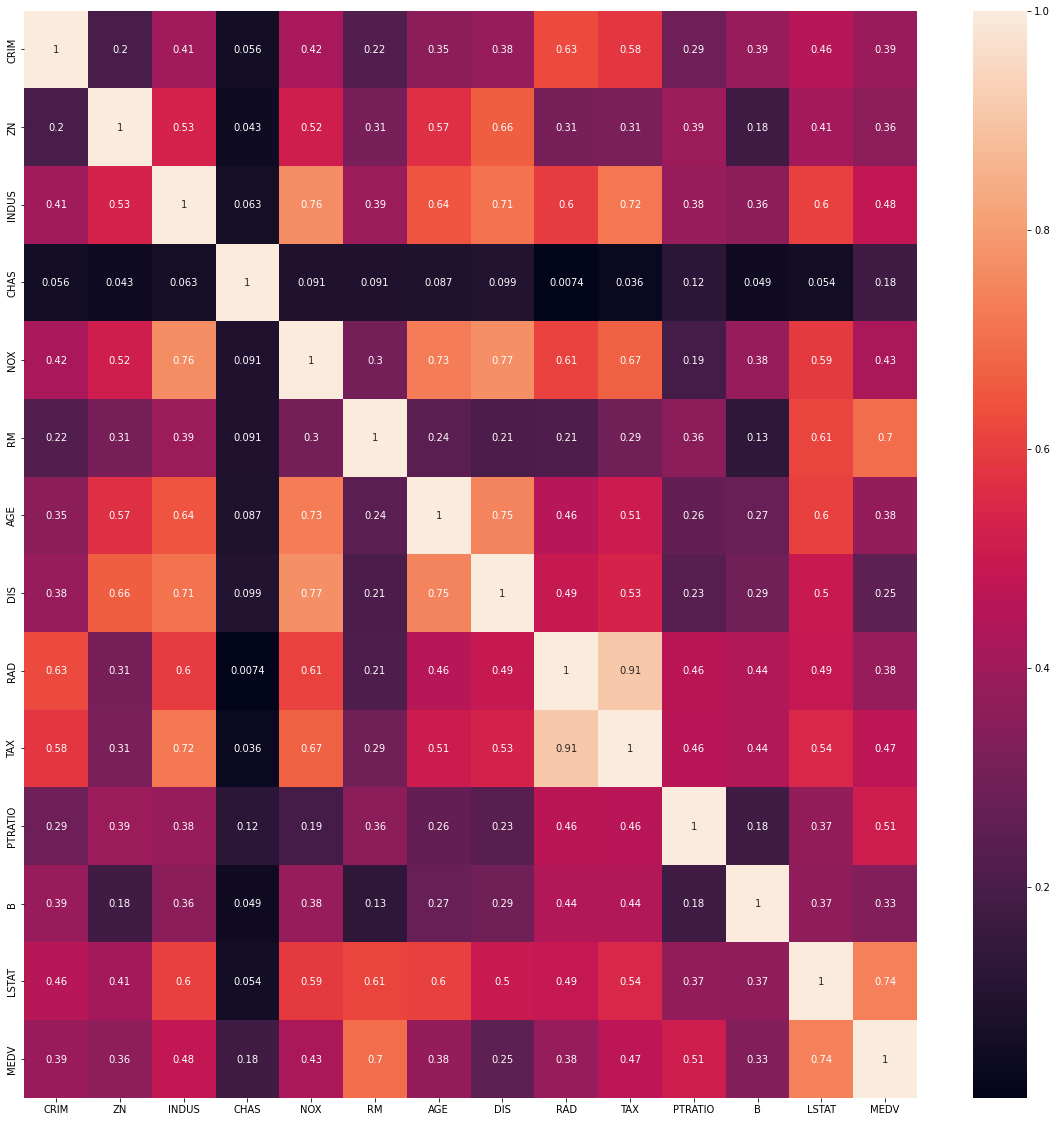

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr().abs(),  annot=True, ax=ax)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

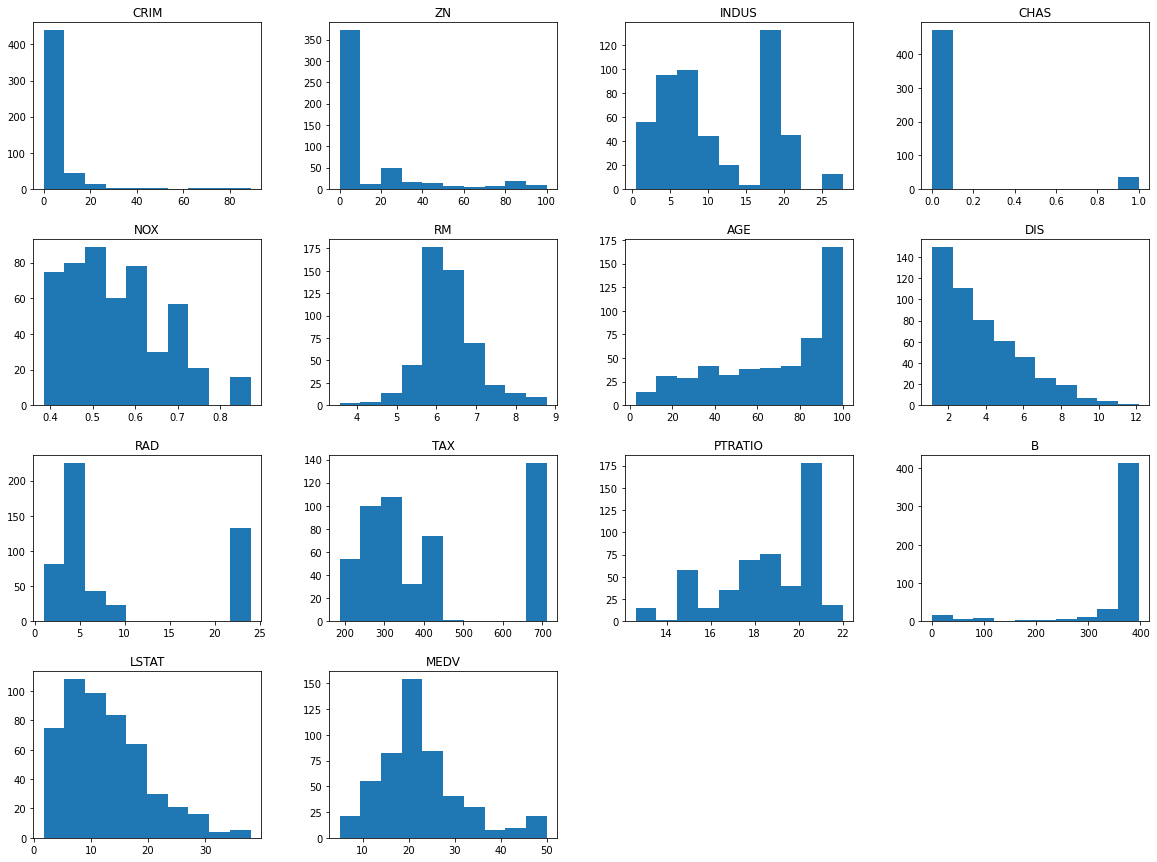

In [ ]:
data.hist(bins=10,figsize=(20,15),grid=False)

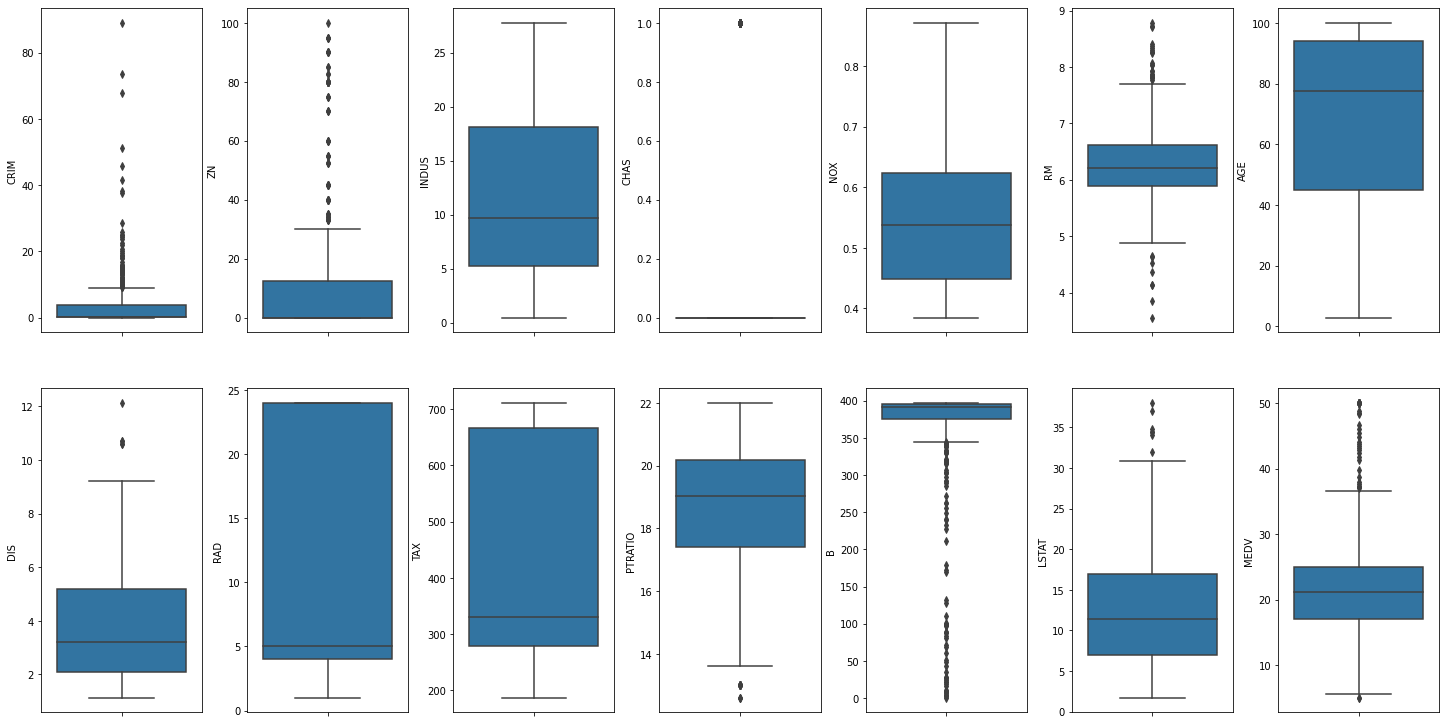

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [ ]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.27%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column MEDV outliers = 4.49%


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

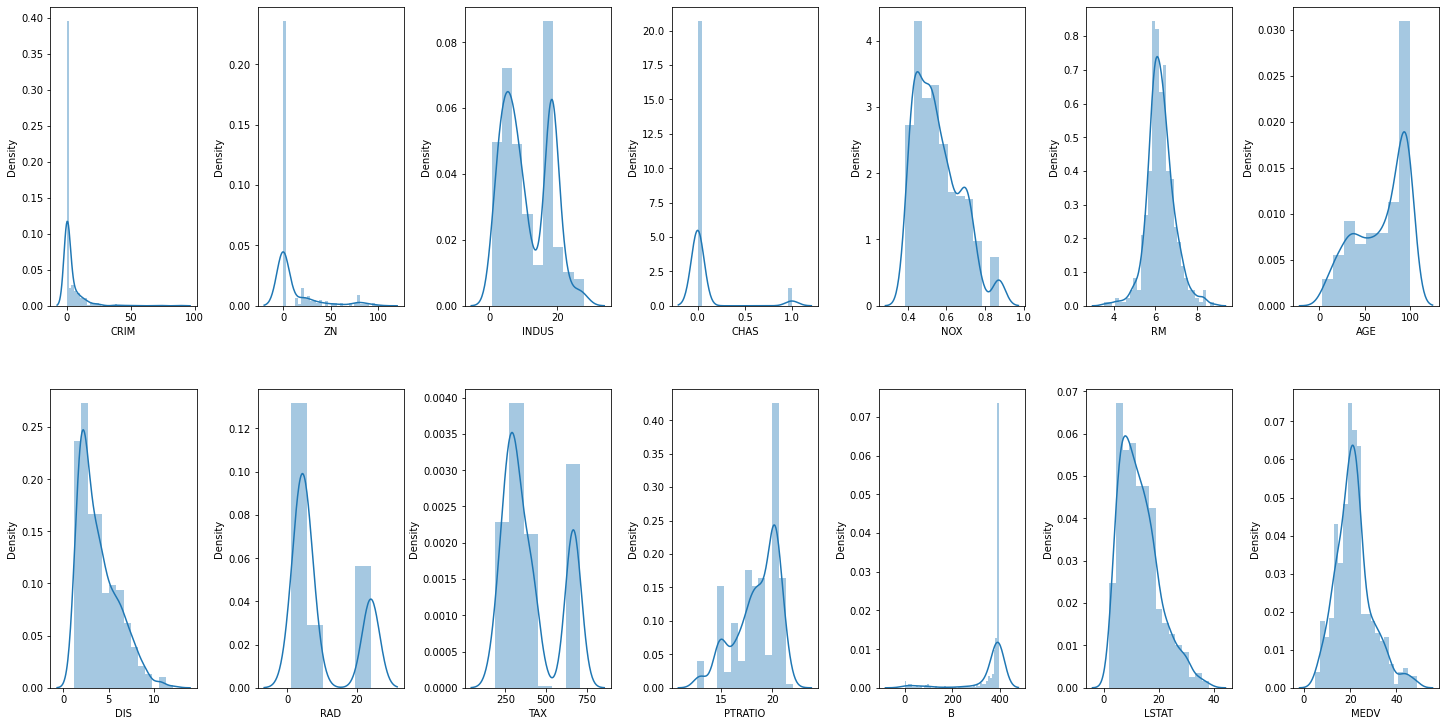

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

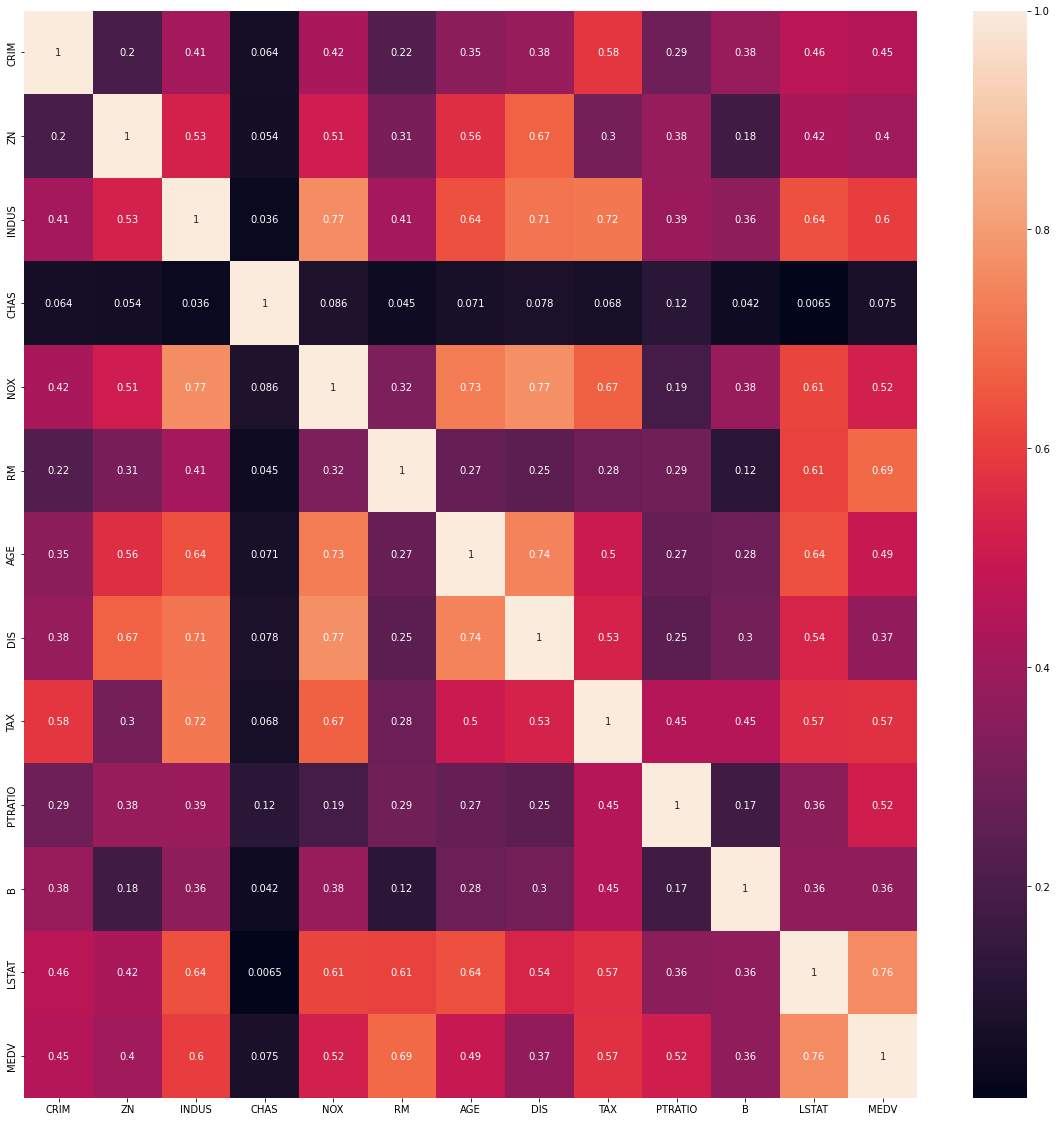

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr().abs(),  annot=True, ax=ax)

In [ ]:
# Dropping columns CHAS, RAD
data.drop('RAD', axis=1, inplace=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(data.loc[:, data.columns != 'MEDV'],data[['MEDV']],test_size=0.2, random_state=1 )

In [ ]:
data.loc[:,data.columns != 'MEDV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [ ]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,666.0,20.2,240.52,23.79
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,284.0,19.7,390.68,6.86
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,666.0,20.2,372.92,30.62
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,398.0,18.7,386.40,12.34
456,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,666.0,20.2,10.48,19.01
...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,264.0,13.0,387.89,8.10
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,305.0,19.2,390.91,5.52
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,666.0,20.2,28.79,34.37
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,300.0,16.6,374.71,5.19


In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
lin_mod = LinearRegression(fit_intercept=True, normalize=True)
lin_mod.fit(x_train, y_train)

LinearRegression(normalize=True)

In [ ]:
y_p = lin_mod.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_p))
r2 = r2_score(y_train, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 3.7638903149681027
r2 score is 0.7755250676556051


In [ ]:
y_p = lin_mod.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_p))
r2 = r2_score(y_test, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 3.97551613933448
r2 score is 0.7189570502019761


# Linear with Polynomial some features

### Number of degree is 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

data2 = data.copy(deep=True)
x = data2.loc[:, data2.columns != 'MEDV']
y = data2[['MEDV']]

In [ ]:
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)

In [ ]:
x

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
lin_mod = LinearRegression(fit_intercept=True, normalize=True)
lin_mod.fit(x_train, y_train)

LinearRegression(normalize=True)

In [ ]:
y_p = lin_mod.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_p))
r2 = r2_score(y_train, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 2.0972439900733604
r2 score is 0.9303065684983335


In [ ]:
y_p = lin_mod.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_p))
r2 = r2_score(y_test, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 3.5091909107761214
r2 score is 0.7810224235092084


### Number of degree 3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

data2 = data.copy(deep=True)
x = data2.loc[:, data2.columns != 'MEDV']
y = data2[['MEDV']]

poly = PolynomialFeatures(3)
x = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lin_mod = LinearRegression(fit_intercept=True, normalize=True)
lin_mod.fit(x_train, y_train)

y_p = lin_mod.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_p))
r2 = r2_score(y_train, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 0.30281072290128747
r2 score is 0.9985470976327816


In [ ]:
y_p = lin_mod.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_p))
r2 = r2_score(y_test, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 321.3501665189339
r2 score is -1835.2961002677498


### Number of degree 6

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

data2 = data.copy(deep=True)
x = data2.loc[:, data2.columns != 'MEDV']
y = data2[['MEDV']]

poly = PolynomialFeatures(6)
x = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lin_mod = LinearRegression(fit_intercept=True, normalize=True)
lin_mod.fit(x_train, y_train)

y_p = lin_mod.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_p))
r2 = r2_score(y_train, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 5.898907810481533e-13
r2 score is 1.0


In [ ]:
y_p = lin_mod.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_p))
r2 = r2_score(y_test, y_p)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 24.279327301021805
r2 score is -9.482357151773618


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5ba1956-2aa0-49ed-9952-f1c7a30328f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>